# Working with GeoParquet Files

In [1]:
import findspark
findspark.init() 

import pyspark
from delta import *

conf = (
    pyspark.conf.SparkConf()
    .setAppName("MY_APP")
    .set(
        "spark.sql.catalog.spark_catalog",
        "org.apache.spark.sql.delta.catalog.DeltaCatalog",
    )
    .set("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension")
#    .set("spark.hadoop.fs.s3a.access.key", access_key)
#    .set("spark.hadoop.fs.s3a.secret.key", secret_key)
    .set("spark.sql.shuffle.partitions", "4")
    .setMaster(
        "local[*]"
    )  # replace the * with your desired number of cores. * for use all.
)

# extra_packages = [
#     "org.apache.hadoop:hadoop-aws:3.3.4",
#     "org.apache.hadoop:hadoop-common:3.3.4",
#     "com.amazonaws:aws-java-sdk-bundle:1.12.262",
# ]

builder = pyspark.sql.SparkSession.builder.appName("MyApp").config(conf=conf)
spark = configure_spark_with_delta_pip(
    builder, #extra_packages=extra_packages
).getOrCreate()


In [1]:
# import pyspark
# from delta import *

# conf = (
#     pyspark.conf.SparkConf()
#     .setAppName("geo")
#     .set(
#         "spark.sql.catalog.spark_catalog",
#         "io.unitycatalog.spark.UCSingleCatalog",
#     )
#     .set("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension")
#     .set("spark.sql.catalog.unity", "io.unitycatalog.spark.UCSingleCatalog")
#     .set("spark.sql.catalog.unity.uri", "http://localhost:8080")
#     .set("spark.sql.catalog.unity.token", "")
#     .set("spark.sql.defaultCatalog", "unity")
# #    .set("spark.hadoop.fs.s3a.access.key", access_key)
# #    .set("spark.hadoop.fs.s3a.secret.key", secret_key)
#     .set("spark.sql.shuffle.partitions", "4")
#     .setMaster(
#         "local[*]"
#     )  # replace the * with your desired number of cores. * for use all.
# )

# extra_packages = [
# #     "org.apache.hadoop:hadoop-aws:3.3.4",
# #     "org.apache.hadoop:hadoop-common:3.3.4",
# #     "com.amazonaws:aws-java-sdk-bundle:1.12.262",
#     "io.delta:delta-spark_2.12:3.2.1",
#     "io.unitycatalog:unitycatalog-spark_2.12:0.2.0",
#     "org.datasyslab:geospark-sql"
# ]

# builder = pyspark.sql.SparkSession.builder.appName("MyApp").config(conf=conf)
# spark = configure_spark_with_delta_pip(
#     builder, extra_packages=extra_packages
# ).getOrCreate()


# #    --packages "io.delta:delta-spark_2.12:3.2.1,io.unitycatalog:unitycatalog-spark_2.12:0.2.0" \
# #    --conf "spark.sql.extensions=io.delta.sql.DeltaSparkSessionExtension" \
# #    --conf "spark.sql.catalog.spark_catalog=io.unitycatalog.spark.UCSingleCatalog" \
#     # --conf "spark.sql.catalog.unity=io.unitycatalog.spark.UCSingleCatalog" \
#     # --conf "spark.sql.catalog.unity.uri=http://localhost:8080" \
#     # --conf "spark.sql.catalog.unity.token=" \
#     # --conf "spark.sql.defaultCatalog=unity"

## Spark: Access Data with Unity Catalog
NOT WORKING ATM

In [3]:
spark.sql("SHOW SCHEMAS").show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [4]:
spark.sql("SHOW TABLES IN default").show()

+---------+-----------------+-----------+
|namespace|        tableName|isTemporary|
+---------+-----------------+-----------+
|  default|        marksheet|      false|
|  default|marksheet_uniform|      false|
|  default|          numbers|      false|
|  default|   user_countries|      false|
+---------+-----------------+-----------+



In [5]:
spark.sql("SHOW VOLUMES IN default").show()

ParseException: 
[PARSE_SYNTAX_ERROR] Syntax error at or near 'IN': missing 'FUNCTIONS'.(line 1, pos 13)

== SQL ==
SHOW VOLUMES IN default
-------------^^^


## GeoPandas: Access Data and Plot

In [7]:
import geopandas
import matplotlib.pyplot as plt

In [8]:
df_pd = geopandas.read_parquet("/Users/rpelgrim/Desktop/unity-data/boston.geoparquet")

In [9]:
df_pd.head(15)

,id,geometry,version,sources,subtype,class,names,level,has_parts,height,...,min_height,min_floor,facade_color,facade_material,roof_material,roof_shape,roof_direction,roof_orientation,roof_color,roof_height
0,08b2a30663865fff0200d10759af600b,"POLYGON ((-71.06744 42.35357, -71.06743 42.353...",0,"[{'property': '', 'dataset': 'OpenStreetMap', ...",outbuilding,shed,None,NaN,False,2.0,...,NaN,NaN,None,wood,None,None,NaN,None,#000000,NaN
1,08b2a3066386cfff0200a7789900f307,"POLYGON ((-71.06709 42.3531, -71.06706 42.3530...",0,"[{'property': '', 'dataset': 'OpenStreetMap', ...",service,service,None,NaN,False,NaN,...,NaN,NaN,None,brick,None,None,NaN,None,None,NaN
2,08b2a3066394afff02005cd65f21d426,"POLYGON ((-71.06723 42.3546, -71.06722 42.3545...",0,"[{'property': '', 'dataset': 'OpenStreetMap', ...",outbuilding,shed,None,NaN,False,2.0,...,NaN,NaN,None,wood,None,None,NaN,None,#000000,NaN
3,08b2a3066394efff0200f13264df7784,"POLYGON ((-71.06693 42.35488, -71.06697 42.354...",0,"[{'property': '', 'dataset': 'OpenStreetMap', ...",transportation,parking,"{'primary': 'Boston Common Parking Garage', 'c...",NaN,False,5.4,...,NaN,NaN,None,None,None,pyramidal,NaN,None,None,NaN
4,08b2a30663948fff02009e209407ebe8,"POLYGON ((-71.0664 42.35434, -71.06643 42.3543...",0,"[{'property': '', 'dataset': 'OpenStreetMap', ...",commercial,None,"{'primary': 'Earl of Sandwich', 'common': None...",NaN,False,5.5,...,NaN,NaN,None,None,None,None,NaN,None,None,NaN
5,08b2a306614b6fff0200d5fa4a4cf210,"POLYGON ((-71.06551 42.35431, -71.0655 42.3543...",0,"[{'property': '', 'dataset': 'OpenStreetMap', ...",religious,temple,"{'primary': 'Parkman Bandstand', 'common': Non...",NaN,False,9.8,...,NaN,NaN,None,stone,None,None,NaN,None,None,NaN
6,08b2a30663972fff02005db9a15a00c1,"POLYGON ((-71.06803 42.35681, -71.06795 42.356...",0,"[{'property': '', 'dataset': 'OpenStreetMap', ...",residential,apartments,None,NaN,False,24.3,...,NaN,NaN,None,None,None,None,NaN,None,None,NaN
7,08b2a30663909fff0200ef685b4124de,"POLYGON ((-71.06817 42.357, -71.06813 42.35687...",0,"[{'property': '', 'dataset': 'OpenStreetMap', ...",residential,apartments,None,NaN,False,19.3,...,NaN,NaN,None,None,None,None,NaN,None,None,NaN
8,08b2a30663972fff0200157564f37dd1,"POLYGON ((-71.06803 42.35702, -71.06799 42.356...",0,"[{'property': '', 'dataset': 'OpenStreetMap', ...",residential,apartments,None,NaN,False,24.5,...,NaN,NaN,None,None,None,None,NaN,None,None,NaN
9,08b2a30663972fff0200ece732cafed7,"POLYGON ((-71.06795 42.35704, -71.0678 42.3566...",0,"[{'property': '', 'dataset': 'OpenStreetMap', ...",residential,apartments,None,NaN,False,23.5,...,NaN,NaN,None,None,None,None,NaN,None,None,NaN


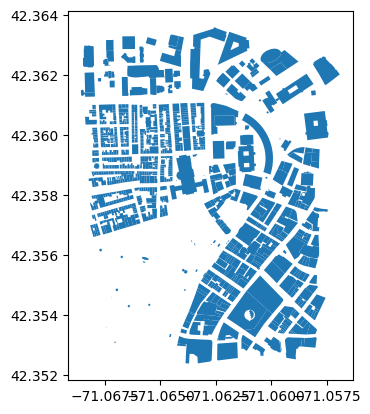

In [12]:
df_pd.plot()
plt.savefig("boston.jpg")

## Spark: Access Data without Unity Catalog

In [26]:
# load buildings in Boston
df = spark.read.parquet("/Users/rpelgrim/Desktop/unity-data/boston.geoparquet")

In [27]:
df.columns

['id',
 'geometry',
 'bbox',
 'version',
 'sources',
 'subtype',
 'class',
 'names',
 'level',
 'has_parts',
 'height',
 'is_underground',
 'num_floors',
 'num_floors_underground',
 'min_height',
 'min_floor',
 'facade_color',
 'facade_material',
 'roof_material',
 'roof_shape',
 'roof_direction',
 'roof_orientation',
 'roof_color',
 'roof_height']

In [29]:
df.select(df.id, df.names, df.subtype, df.height, df.num_floors, df.geometry).show(3)

+--------------------+-----+-----------+------+----------+--------------------+
|                  id|names|    subtype|height|num_floors|            geometry|
+--------------------+-----+-----------+------+----------+--------------------+
|08b2a30663865fff0...| NULL|outbuilding|   2.0|      NULL|[00 00 00 00 03 0...|
|08b2a3066386cfff0...| NULL|    service|  NULL|      NULL|[00 00 00 00 03 0...|
|08b2a3066394afff0...| NULL|outbuilding|   2.0|      NULL|[00 00 00 00 03 0...|
+--------------------+-----+-----------+------+----------+--------------------+
only showing top 3 rows



In [30]:
df.count()

920

## Transform data

In [10]:
# filter residential buildings only
df_res = df.where(df.subtype == "residential")

In [11]:
df_res.count()

223

## Write to Delta Lake

In [42]:
df_res.write.format("delta").save("data/boston-residential")

## Read Delta Lake

In [43]:
df = spark.read.format("delta").load("data/boston-residential")

In [44]:
df.show(2)

+--------------------+--------------------+--------------------+-------+--------------------+-----------+----------+-----+-----+---------+------+--------------+----------+----------------------+----------+---------+------------+---------------+-------------+----------+--------------+----------------+----------+-----------+
|                  id|            geometry|                bbox|version|             sources|    subtype|     class|names|level|has_parts|height|is_underground|num_floors|num_floors_underground|min_height|min_floor|facade_color|facade_material|roof_material|roof_shape|roof_direction|roof_orientation|roof_color|roof_height|
+--------------------+--------------------+--------------------+-------+--------------------+-----------+----------+-----+-----+---------+------+--------------+----------+----------------------+----------+---------+------------+---------------+-------------+----------+--------------+----------------+----------+-----------+
|08b2a30663972fff0...|[00

In [45]:
df.count()

223

# Places Dataset

In [2]:
# load complete Places dataset
df = spark.read.parquet("/Users/rpelgrim/Desktop/unity-data/places.geoparquet")

In [3]:
df.columns

['id',
 'geometry',
 'bbox',
 'version',
 'sources',
 'names',
 'categories',
 'confidence',
 'websites',
 'socials',
 'emails',
 'phones',
 'brand',
 'addresses']

In [4]:
df.select(df.id, df.names, df.categories, df.brand, df.addresses, df.geometry).show(5)

+--------------------+--------------------+--------------------+-----+--------------------+--------------------+
|                  id|               names|          categories|brand|           addresses|            geometry|
+--------------------+--------------------+--------------------+-----+--------------------+--------------------+
|08ff39b22bae03010...|{Mount Boyd, NULL...|    {mountain, NULL}| NULL|[{NULL, NULL, NUL...|[00 00 00 00 01 C...|
|08ff39ba2b6909990...|{Erickson Glacier...|{landmark_and_his...| NULL|                NULL|[00 00 00 00 01 C...|
|08ff39b209b20c1b0...|{Mount Cromie, NU...|    {mountain, NULL}| NULL|[{NULL, NULL, NUL...|[00 00 00 00 01 C...|
|08ff39b273830b240...|{Monte Bennett, N...|    {mountain, NULL}| NULL|[{NULL, NULL, NUL...|[00 00 00 00 01 C...|
|08ff39ba555544a30...|{O'Leary Peak (An...|    {mountain, NULL}| NULL|[{NULL, NULL, NUL...|[00 00 00 00 01 C...|
+--------------------+--------------------+--------------------+-----+--------------------+-----

In [5]:
df.count()

53311644

There are more than 53M rows in this Places dataset. Size on disk is ~8GB.

In [9]:
%%time
df2 = df.groupBy("categories").count().collect()

CPU times: user 14.3 s, sys: 556 ms, total: 14.9 s
Wall time: 25 s


In [10]:
df3 = df.limit(10_000)

In [11]:
df3.write.format("delta").save("/Users/rpelgrim/Desktop/unity-data/places_10K")

In [12]:
df.write.format("delta").save("/Users/rpelgrim/Desktop/unity-data/places_all")

ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/Users/rpelgrim/miniforge3/envs/delta-geo/lib/python3.13/site-packages/pyspark/errors/exceptions/captured.py", line 179, in deco
    return f(*a, **kw)
  File "/Users/rpelgrim/miniforge3/envs/delta-geo/lib/python3.13/site-packages/py4j/protocol.py", line 326, in get_return_value
    raise Py4JJavaError(
        "An error occurred while calling {0}{1}{2}.\n".
        format(target_id, ".", name), value)
py4j.protocol.Py4JJavaError: <exception str() failed>

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/rpelgrim/miniforge3/envs/delta-geo/lib/python3.13/site-packages/py4j/clientserver.py", line 516, in send_command
    raise Py4JNetworkError("Answer from Java side is empty")
py4j.protocol.Py4JNetworkError: Answer from Java side is empty

During handling of the above exception, another exception occurred:

Traceback (most recent cal

Py4JError: org does not exist in the JVM